# Region of Interest (ROI) Extraction in Medical Images

## Objective
To demonstrate different Region of Interest (ROI) extraction techniques used in medical image preprocessing.
The focus is on understanding how various methods isolate relevant anatomical regions from background information.

This notebook emphasizes preprocessing behavior and limitations,
not clinical diagnosis or predictive modeling.


In [1]:
#Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


- `import cv2`  
  Imports OpenCV for image processing operations such as thresholding and contour handling.

- `import numpy as np`  
  Imports NumPy for numerical operations and reshaping image data.

- `import matplotlib.pyplot as plt`  
  Imports Matplotlib for visualizing images and segmentation outputs.

- `from sklearn.cluster import KMeans`  
  Imports the K-Means clustering algorithm used for unsupervised ROI extraction.


In [2]:
#Upload Medical Image
from google.colab import files
uploaded = files.upload()


Saving Chest X-Ray Images.jpeg to Chest X-Ray Images.jpeg


- `from google.colab import files`  
  Imports Colab utilities for uploading files from the local system.

- `uploaded = files.upload()`  
  Opens a dialog to upload a medical image for ROI extraction experiments.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

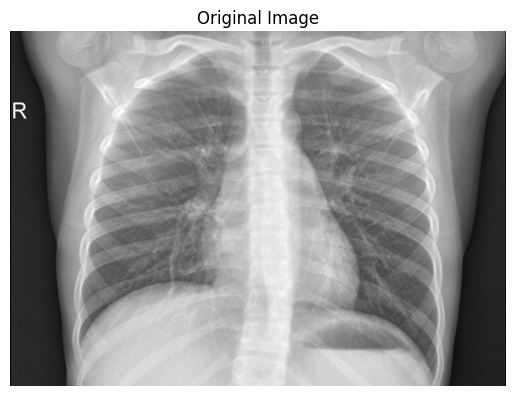

In [3]:
#Read and Display Original Image
img = cv2.imread(list(uploaded.keys())[0])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


- `cv2.imread(...)`  
  Reads the uploaded image into memory as a NumPy array.

- `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`  
  Converts the image from BGR to RGB for correct visualization.

- `plt.imshow(img_rgb)`  
  Displays the original image.

- `plt.title("Original Image")`  
  Adds a descriptive title.

- `plt.axis("off")`  
  Removes axes to focus on the image content.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

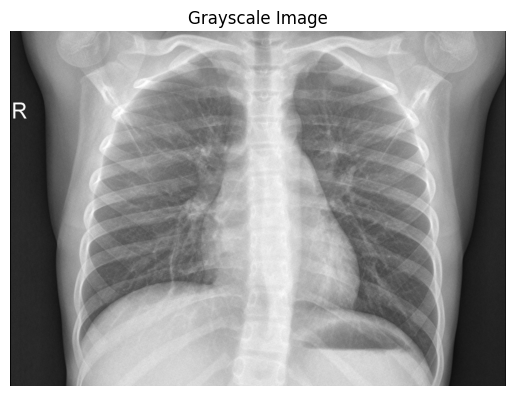

In [4]:
#Convert Image to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")


- `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`  
  Converts the image to grayscale for intensity-based ROI extraction.

Medical image segmentation often relies on intensity differences rather than color information.

- `plt.imshow(gray, cmap='gray')`  
  Displays the grayscale image.

- `plt.title("Grayscale Image")`  
  Labels the image.

- `plt.axis("off")`  
  Removes axis markings.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

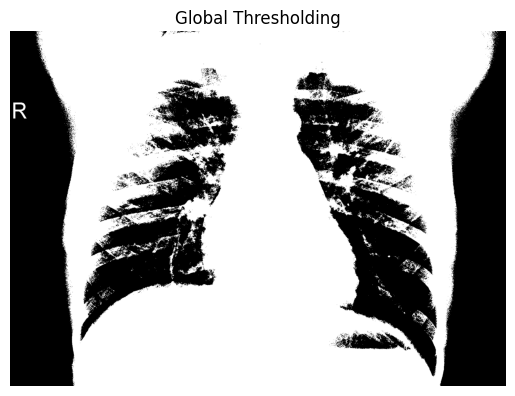

In [5]:
#Global Thresholding
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.axis("off")


- `cv2.threshold(...)`  
  Applies a single fixed threshold value to the entire image.

- `127`  
  Threshold intensity value used to separate foreground from background.

- `255`  
  Pixel value assigned to foreground regions.

- `cv2.THRESH_BINARY`  
  Converts the image into a binary mask.

Global thresholding works best when there is strong contrast between the ROI and background.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

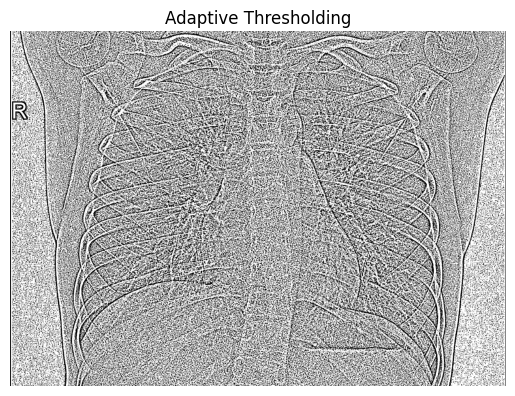

In [6]:
#Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")


- `cv2.adaptiveThreshold(...)`  
  Computes threshold values locally for different regions of the image.

- `cv2.ADAPTIVE_THRESH_MEAN_C`  
  Uses the mean intensity of local neighborhoods.

- `11`  
  Size of the neighborhood window.

- `2`  
  Constant subtracted from the computed threshold.

Adaptive thresholding is useful when illumination or intensity varies across the image.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

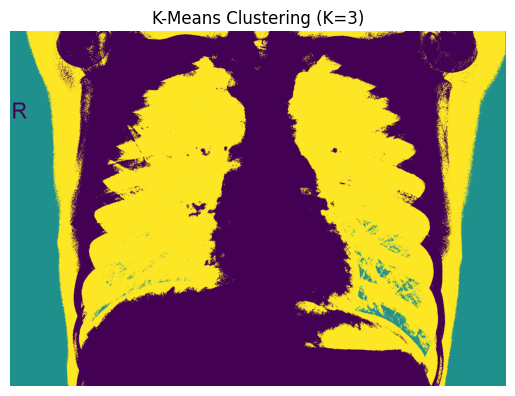

In [7]:
#K-Means Clustering for ROI Extraction
pixels = gray.reshape((-1, 1))
pixels = np.float32(pixels)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(pixels)

segmented = labels.reshape(gray.shape)

plt.imshow(segmented, cmap='viridis')
plt.title("K-Means Clustering (K=3)")
plt.axis("off")


- `gray.reshape((-1, 1))`  
  Converts the 2D image into a 1D array of pixel intensities.

- `np.float32(pixels)`  
  Converts data type to float for clustering.

- `KMeans(n_clusters=3)`  
  Specifies three intensity-based clusters.

- `fit_predict(pixels)`  
  Assigns each pixel to a cluster.

- `reshape(gray.shape)`  
  Reshapes clustering output back into image form.

K-Means clustering separates regions based on intensity similarity without predefined thresholds.


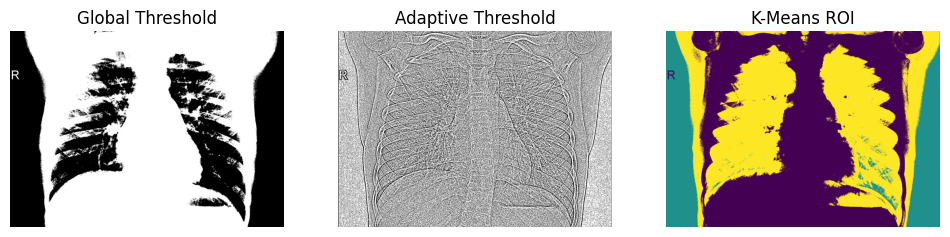

In [8]:
#Visual Comparison
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Threshold")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(segmented, cmap='viridis')
plt.title("K-Means ROI")
plt.axis("off")

plt.show()


- This visualization compares different ROI extraction methods side by side.
- Global thresholding shows limitations when contrast is inconsistent.
- Adaptive thresholding handles local variations better.
- K-Means clustering groups regions based on intensity similarity.


### Observations

- Global thresholding is effective only when intensity contrast is strong.
- Adaptive thresholding performs better under uneven illumination.
- K-Means clustering provides flexible ROI separation without manual threshold selection.
- ROI quality depends heavily on image characteristics and parameter choice.


### Limitations

- Threshold-based methods may fail when foreground and background intensities overlap.
- K-Means clustering requires manual selection of cluster count.
- ROI extraction does not guarantee anatomical correctness without clinical validation.
- These methods serve as preprocessing steps, not standalone diagnostic tools.
